# Assignment 7 - Concept and Applied questions (ISLP, pp. 552-554)

In [16]:
__author__ = "Will Hinton"
__email__ = "willhint@gmail.com"
__website__ = "whinton0.github.com/py"

# <font color='blue'>Concept Question (Chapter 12, number 1. ISLP, p. 552) </font>
### (a) Proof of Equation 12.18: Understanding the Relationship Between K-Means Clustering Metrics 

<mark>Answer:</mark>
In k-means clustering, it is important to understand the relationship between the within-cluster sum of squares (how far points are from each other) and the distance from points to the cluster center. The proof of equation 12.18 in ISLP Chapter 12 formally shows that two different ways of measuring clustering quality actually amount to the same thing, just scaled slightly differently. The left-hand side (LHS) of the equation starts by considering the average squared distance between every possible pair of points within a cluster $C_k$. Algebraically, we expand the squared difference term $(x_{ij} - x_{i{\prime}j})^2$ into three parts: the square of the first point, minus twice the product of the two points, plus the square of the second point. Because we sum over all pairs $i, i{\prime}$ and all features $j$, this creates terms involving sums of squares and sums of products. Meanwhile, the right-hand side (RHS) starts with a different viewpoint: it adds up the squared distances of each point to the cluster’s mean $\bar{x}_{kj}$, rather than to each other. Expanding this also produces a similar structure: sums of squares, sums involving the mean, and terms involving the mean squared. 
$$
LHS = \frac{1}{|C_{k}|} \sum_{i,i' \in C_{k}} \sum_{j=1}^{p}(x_{ij}-x_{i'j})^{2} =\frac{1}{|C_{k}|} \sum_{i,i' \in C_{k}}\sum_{j=1}^{p} x_{ij}^{2}-\frac{2}{|C_{k}|} \sum_{i,i' \in C_{k}}\sum_{j=1}^{p} x_{ij}x_{i'j}+\frac{1}{|C_{k}|} \sum_{i,i' \in C_{k}}\sum_{j=1}^{p} x_{i'j}^{2}
$$  

$$
RHS = 2\sum_{i \in C_{k}} \sum_{j=1}^{p} (x_{ij}-\bar x_{kj})^{2} = 2\sum_{i \in C_{k}} \sum_{j=1}^{p} x_{ij}^{2}-4\sum_{i \in C_{k}} \sum_{j=1}^{p}x_{ij} \bar x_{kj}+ 2\sum_{i \in C_{k}} \sum_{j=1}^{p} \bar x_{kj}^{2} 
$$ 

By careful reorganization, it turns out that the two complicated-looking expressions are actually linked. Specifically, averaging the squared distances between all point-pairs is exactly twice the sum of squared distances from points to the cluster center. This makes intuitive sense: when you think about how spread out a cluster is, you can either measure how far apart points are from each other, or how far they are from the center—both give consistent information about the cluster’s tightness. Mathematically, the proof uses simple algebraic expansion, properties of summation, and the definition of a mean to show that the LHS simplifies to the RHS after proper rearrangement. In practice, this result is fundamental to why k-means clustering tries to minimize the sum of distances from each point to the center: doing so is equivalent to making the points as close to each other as possible. 

I didn't include a plot here, but a plot to visualize LHS vs RHS in K-means clustering would show: 
- LHS: Average squared distance between all pairs of points
- RHS: Twice the sum of squared distances from points to the mean
- LHS ~ RHS: they are theoretically equal based on the proof above.

### (b) Understanding K-Means Objective Decrease at Each Iteration 
This problem concerns the behavior of the K-means clustering algorithm. In part (a), we proved identity (12.18), which links the average pairwise distances within clusters to the distances of individual points from the cluster mean. Now, based on this identity, we are asked to argue why the K-means clustering algorithm (Algorithm 12.2) must decrease the objective function (equation 12.17) at every iteration.   

<mark>Answer:</mark>  
In the K-means clustering algorithm, each step is designed to improve the grouping of the data. Specifically, the algorithm repeatedly reassigns each data point to the cluster whose center (mean) it is closest to. After each reassignment step, the total amount of "error"—measured as the sum of the squared distances from each point to its cluster center—gets smaller. Based on the identity proved earlier (12.18), we know that this total squared distance is directly connected to how tightly packed the points are within each cluster.
Each time points are moved to their nearest center, they end up closer to their cluster’s new mean, and thus the total squared distance (the objective function 12.17) decreases. Additionally, after recomputing the cluster means, the new centers better represent the current group of points, which also helps reduce the total distance further. In simple terms, K-means ensures that after every update, the points are grouped more tightly around their centers, and the "messiness" or "spread" of the clustering steadily goes down. Therefore, at every iteration of K-means, the algorithm must either improve (decrease the objective) or at least stay the same, but it can never make the clustering worse.


# <font color='blue'>Applied Question (Chapter 12, number 9. ISLP, p. 554) </font> 

### Consider the USArrests data. We will now perform hierarchical clustering on the states. (James, et al., 2023) 
### (a) Using hierarchical clustering with complete linkage and Euclidean distance, cluster the states. (James, et al., 2023) 
### (b) Cut the dendrogram at a height that results in the three distinct clusters. (James, et al., 2023) 

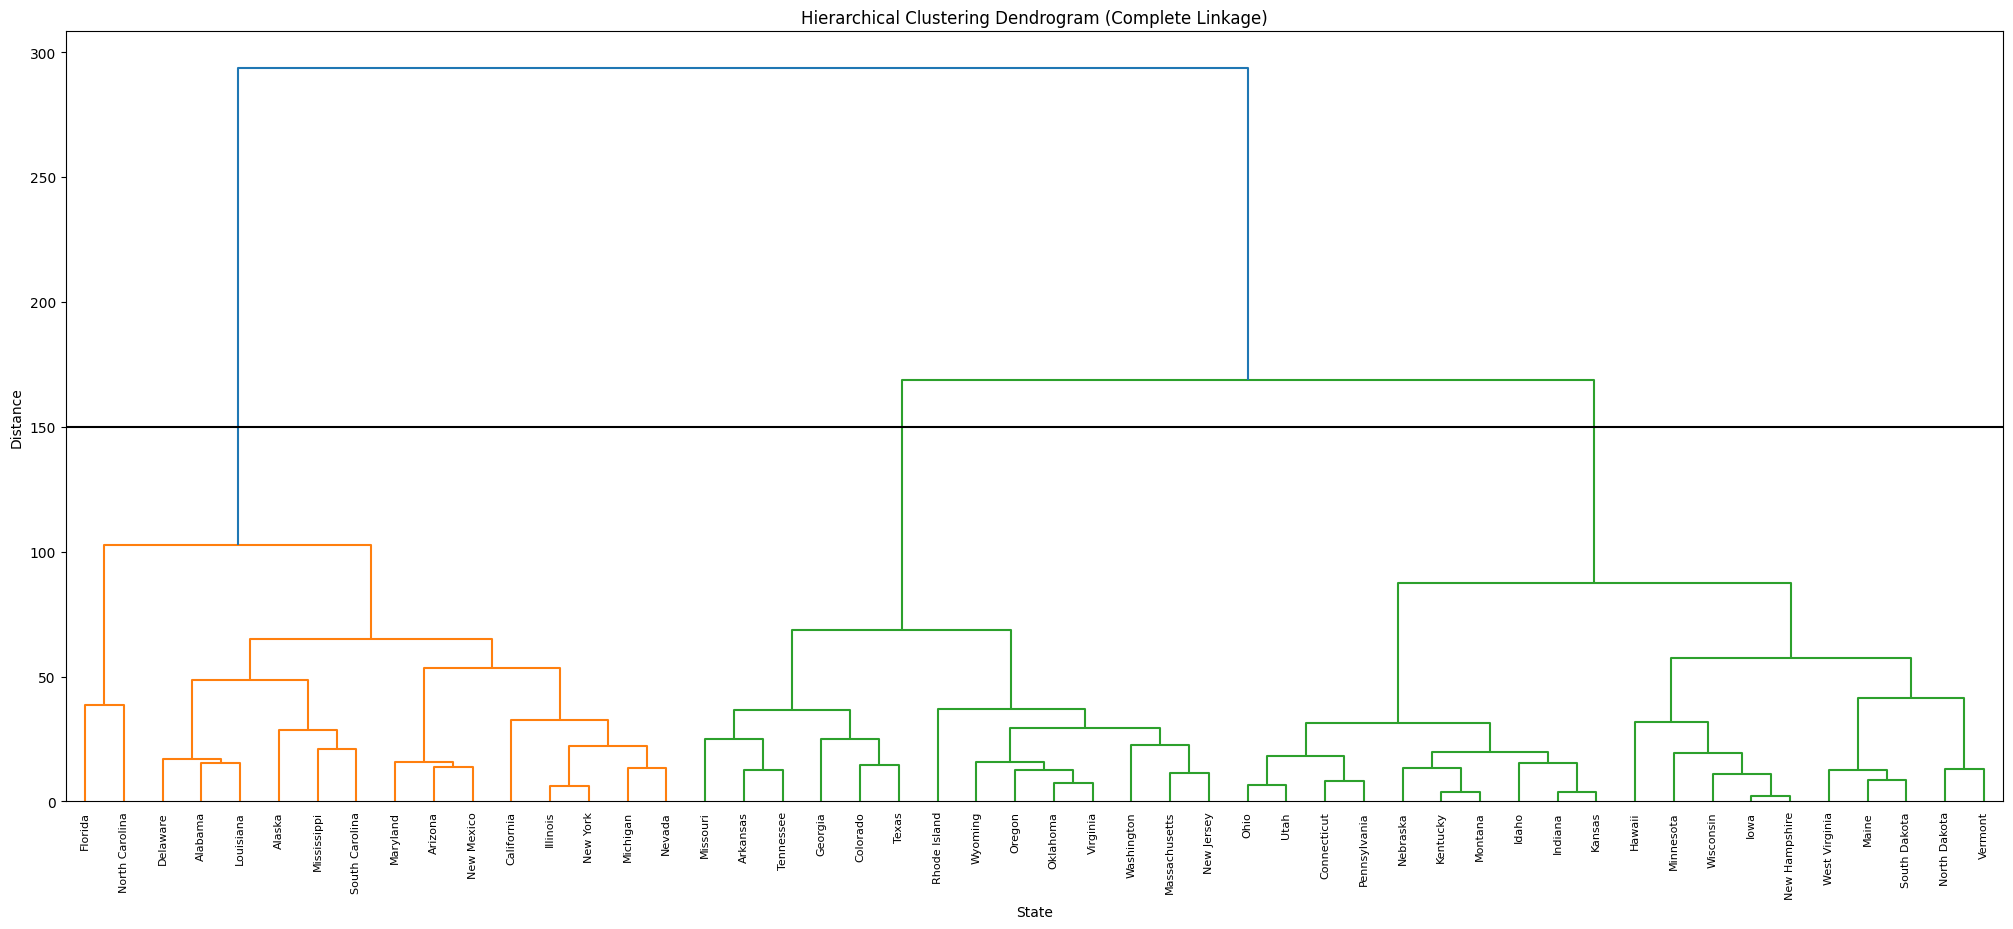

In [17]:
# Applied Question 9(a),(b) 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import scale
from statsmodels.datasets import get_rdataset

# Load the USArrests dataset
USArrests = get_rdataset('USArrests').data
# Copy the data into a new DataFrame
df = USArrests.copy()

# Rename the 'Unnamed: 0' column to 'State' if needed
if 'Unnamed: 0' in df.columns:
    df.rename(columns={'Unnamed: 0': 'State'}, inplace=True)
else:
    df.index.name = 'State'
    df.reset_index(inplace=True)

# Select the features for clustering
X = df[['Murder', 'Assault', 'UrbanPop', 'Rape']]

# Perform hierarchical clustering
Z = linkage(X, method='complete')

# Plot the dendrogram
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z, labels=df['State'].tolist())
plt.axhline(y=150, c='k')
plt.title('Hierarchical Clustering Dendrogram (Complete Linkage)')
plt.xlabel('State')
plt.ylabel('Distance')
plt.show() 

### (c) Hierarchically cluster the states using complete linkage and Euclidean distance, after scaling the variables to have standard deviation of one. (James, et al., 2023)

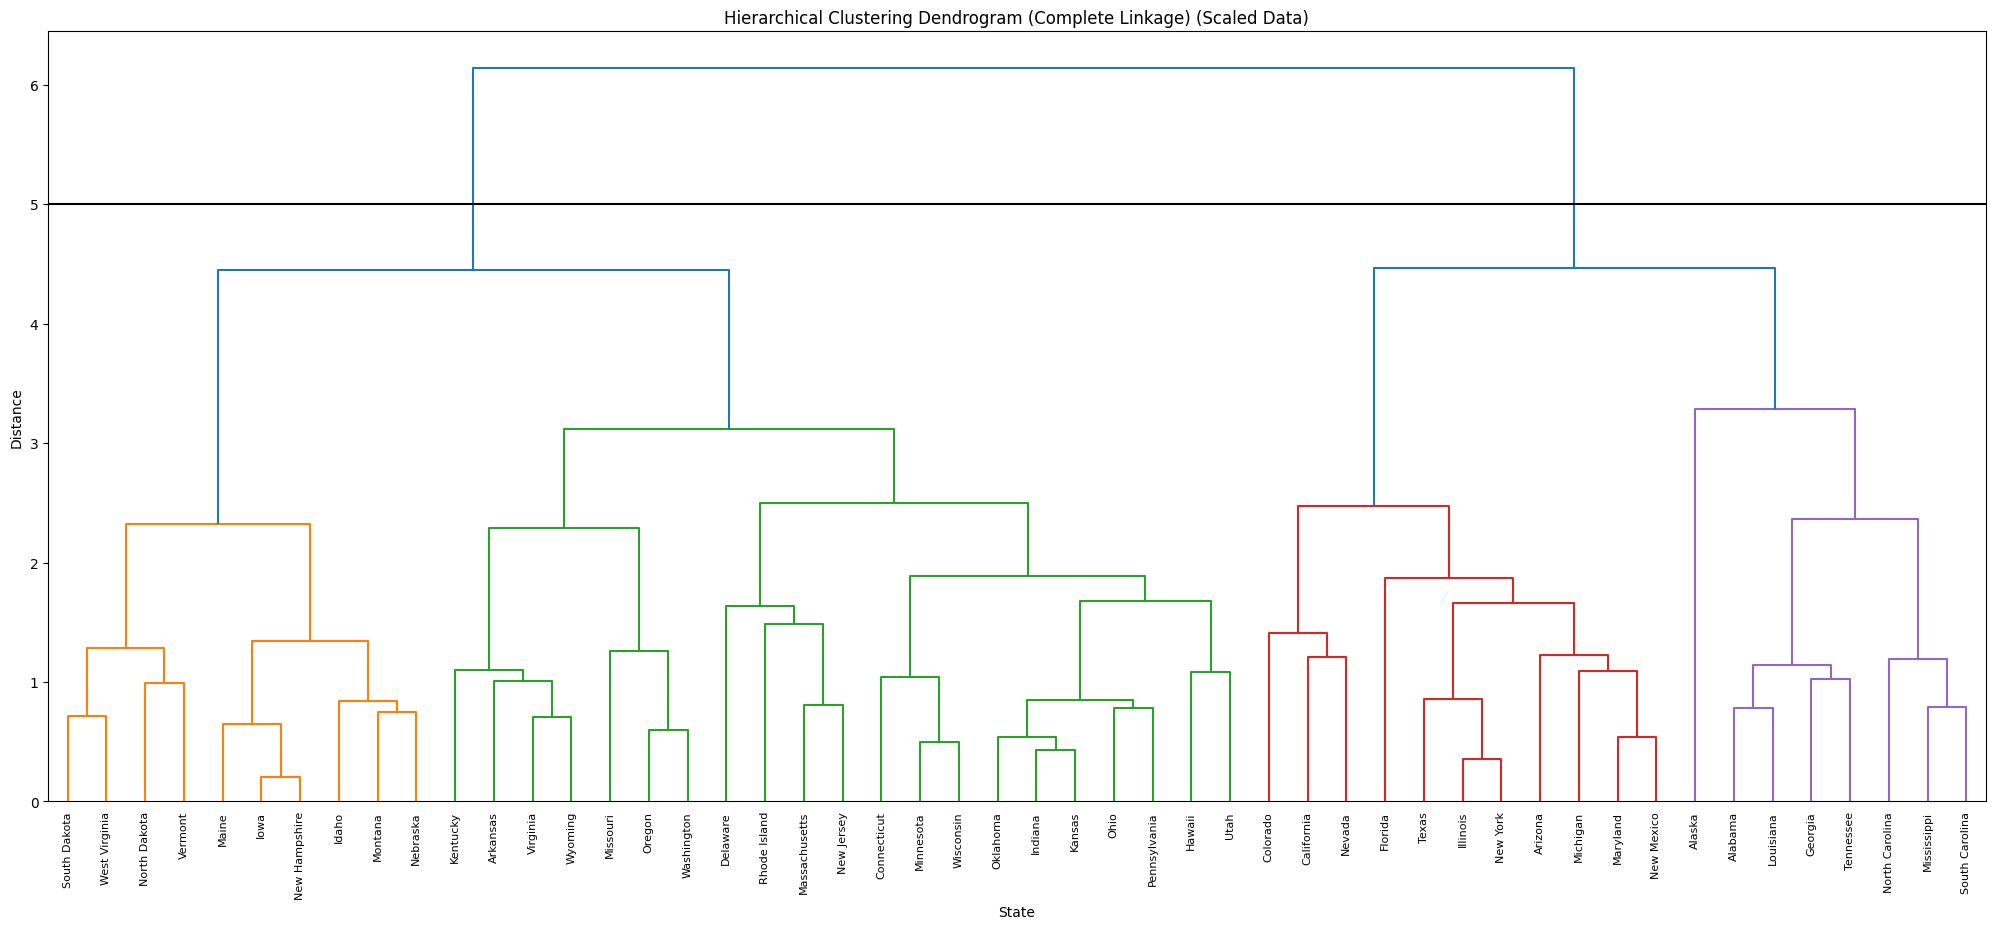

In [18]:
 # Applied Question 9(c)
 
 # Scale the variables across columns (axis=0)
 df[['Murder', 'Assault', 'UrbanPop', 'Rape']] = scale(df[['Murder', 'Assault', 'UrbanPop',     'Rape']], axis=0)
 
 X = df[['Murder', 'Assault', 'UrbanPop', 'Rape']]
 Z = linkage(X, method='complete')
 
 fig = plt.figure(figsize=(25, 10))
 dn = dendrogram(Z, labels=df['State'].tolist())
 plt.axhline(y=5, c='k')  # adjusted y-line for scaled data
 plt.title('Hierarchical Clustering Dendrogram (Complete Linkage) (Scaled Data)')
 plt.xlabel('State')
 plt.ylabel('Distance')
 plt.show()

### (d) What effect does scaling the variables have on the hierarchical clustering obtained? In your opinion, should the variables be scaled before the inter-observation dissimilarities are computed? (James, et al., 2023)

<mark>Answer:</mark>
Scaling the variables significantly affects the clustering results.
Without scaling, variables measured on larger numerical scales (e.g., Assault) dominate the clustering process.
This biases the results toward variables with larger absolute values 
Therefore, variables should be scaled (standardized) before applying hierarchical clustering.
Scaling ensures that each variable contributes equally by centering them at mean 0 and standard deviation 1.